# Reading In the data from an excel file

In [51]:
library("readxl")
library(tidyverse)
library(dplyr)
#install.packages("writexl")
library(writexl)
#install.packages("ggthemes")
library("ggthemes")
#read_excel("fatality rates h5n1.xlsx")
#getwd()

fat_data <- read_excel("fatality rates h5n1.xlsx")
fat_data

Installing package into 'C:/Users/Unsto/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Unsto\AppData\Local\Temp\Rtmpmu2aQ3\downloaded_packages


Warning message:
"package 'ggthemes' was built under R version 4.4.2"


Year,Cases,Deaths,Fatality Rate,Sample Size,Years from 2024
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2003,4,4,1.0000000,4,21
2004,46,32,0.6956522,46,20
2005,98,43,0.4387755,98,19
2006,115,79,0.6869565,115,18
2007,88,59,0.6704545,88,17
2008,44,33,0.7500000,44,16
2009,73,32,0.4383562,73,15
2010,48,24,0.5000000,48,14
2011,62,34,0.5483871,62,13


In [46]:
getwd()

[1] "C:/Users/Unsto/AppData/Local/Programs/Python/Python39/Scripts/Jupyter files/DST project in jup"

# Deriving weights from a data point

In [3]:
fat_data <- fat_data|>
  mutate(w_sample = `Sample Size` / 145) # Sample Size weight

fat_data <- fat_data|>
  mutate(w_recency = 2.718^(-0.2 *`Years from 2024`)) # Recency weight
#print(fat_data)
#write_xlsx(fat_data, "your_table.xlsx")

fat_data <- fat_data|>
  mutate(final_weight = w_sample * w_recency) # Final weight by combining
fat_data





Year,Cases,Deaths,Fatality Rate,Sample Size,Years from 2024,w_sample,w_recency,final_weight
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2003,4,4,1.0000000,4,21,0.027586207,0.01500211,0.0004138513
2004,46,32,0.6956522,46,20,0.317241379,0.01832324,0.0058128889
2005,98,43,0.4387755,98,19,0.675862069,0.02237959,0.0151255144
2006,115,79,0.6869565,115,18,0.793103448,0.02733392,0.0216786288
2007,88,59,0.6704545,88,17,0.606896552,0.03338504,0.0202612638
2008,44,33,0.7500000,44,16,0.303448276,0.04077573,0.0123733252
2009,73,32,0.4383562,73,15,0.503448276,0.04980256,0.0250730115
2010,48,24,0.5000000,48,14,0.331034483,0.06082772,0.0201360726
2011,62,34,0.5483871,62,13,0.427586207,0.07429360,0.0317669201


# Assigning Each datapoint a fatality rate category



In [57]:
#write_xlsx(fat_data, "your_table.xlsx")

fat_data$Fatality_Category <- with(fat_data, ifelse(`Fatality Rate` <= 0.20, "F1",
                                  ifelse(`Fatality Rate` <= 0.4, "F2",
                                  ifelse(`Fatality Rate` <= 0.60, "F3",
                                  ifelse(`Fatality Rate` <= 0.80, "F4", "F5")))))

fat_data

Year,Cases,Deaths,Fatality Rate,Sample Size,Years from 2024,Fatality_Category
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2003,4,4,1.0000000,4,21,F5
2004,46,32,0.6956522,46,20,F4
2005,98,43,0.4387755,98,19,F3
2006,115,79,0.6869565,115,18,F4
2007,88,59,0.6704545,88,17,F4
2008,44,33,0.7500000,44,16,F4
2009,73,32,0.4383562,73,15,F3
2010,48,24,0.5000000,48,14,F3
2011,62,34,0.5483871,62,13,F3


Warning message:
"Use of `fat_data$Fatality_Category` is discouraged.
ℹ Use `Fatality_Category` instead."


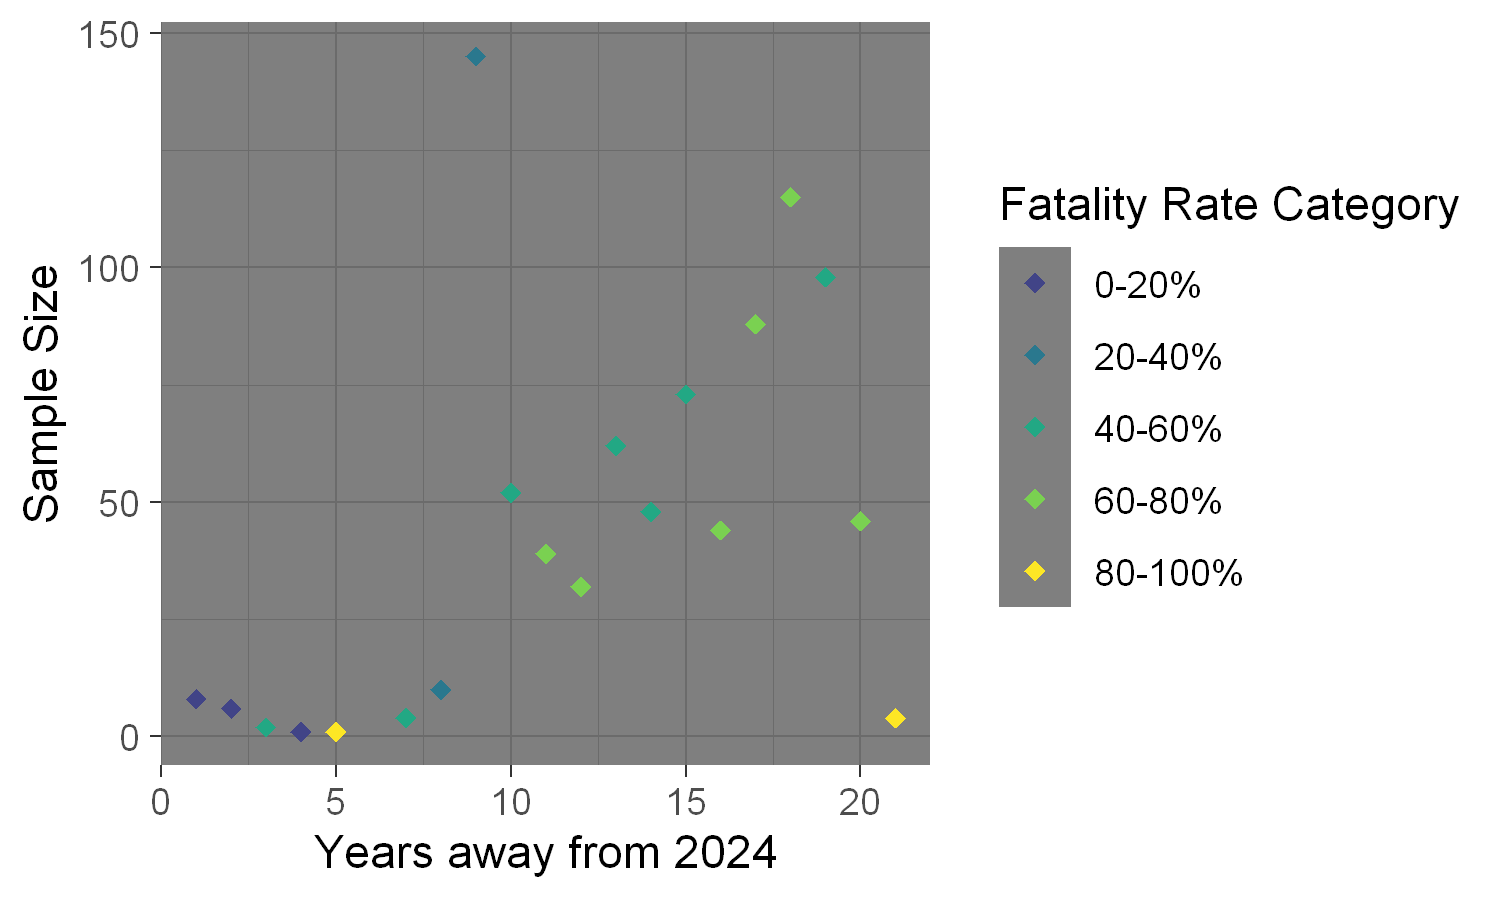

In [88]:
#install.packages("viridis")
library("viridis")
evil_plot <- fat_data|>
    ggplot(aes(x = `Years from 2024`, y = `Sample Size`,color = fat_data$`Fatality_Category`))+
    geom_point(size = 2, shape=18)+
    theme(text = element_text(size = 14))+
    labs(x = "Years away from 2024", color = "Fatality Rate Category")+
     scale_color_viridis_d(
        option = "viridis",  begin = 0.2,       # Avoid the lightest colors
        end = 1,  # Apply the magma palette
        labels = c("0-20%", "20-40%", "40-60%", "60-80%", "80-100%")  # Custom legend labels
    )+
    theme_dark()
#scale_color_viridis(discrete=TRUE, option="plasma")
options(repr.plot.width = 5, repr.plot.height = 3,repr.plot.res = 300)
evil_plot




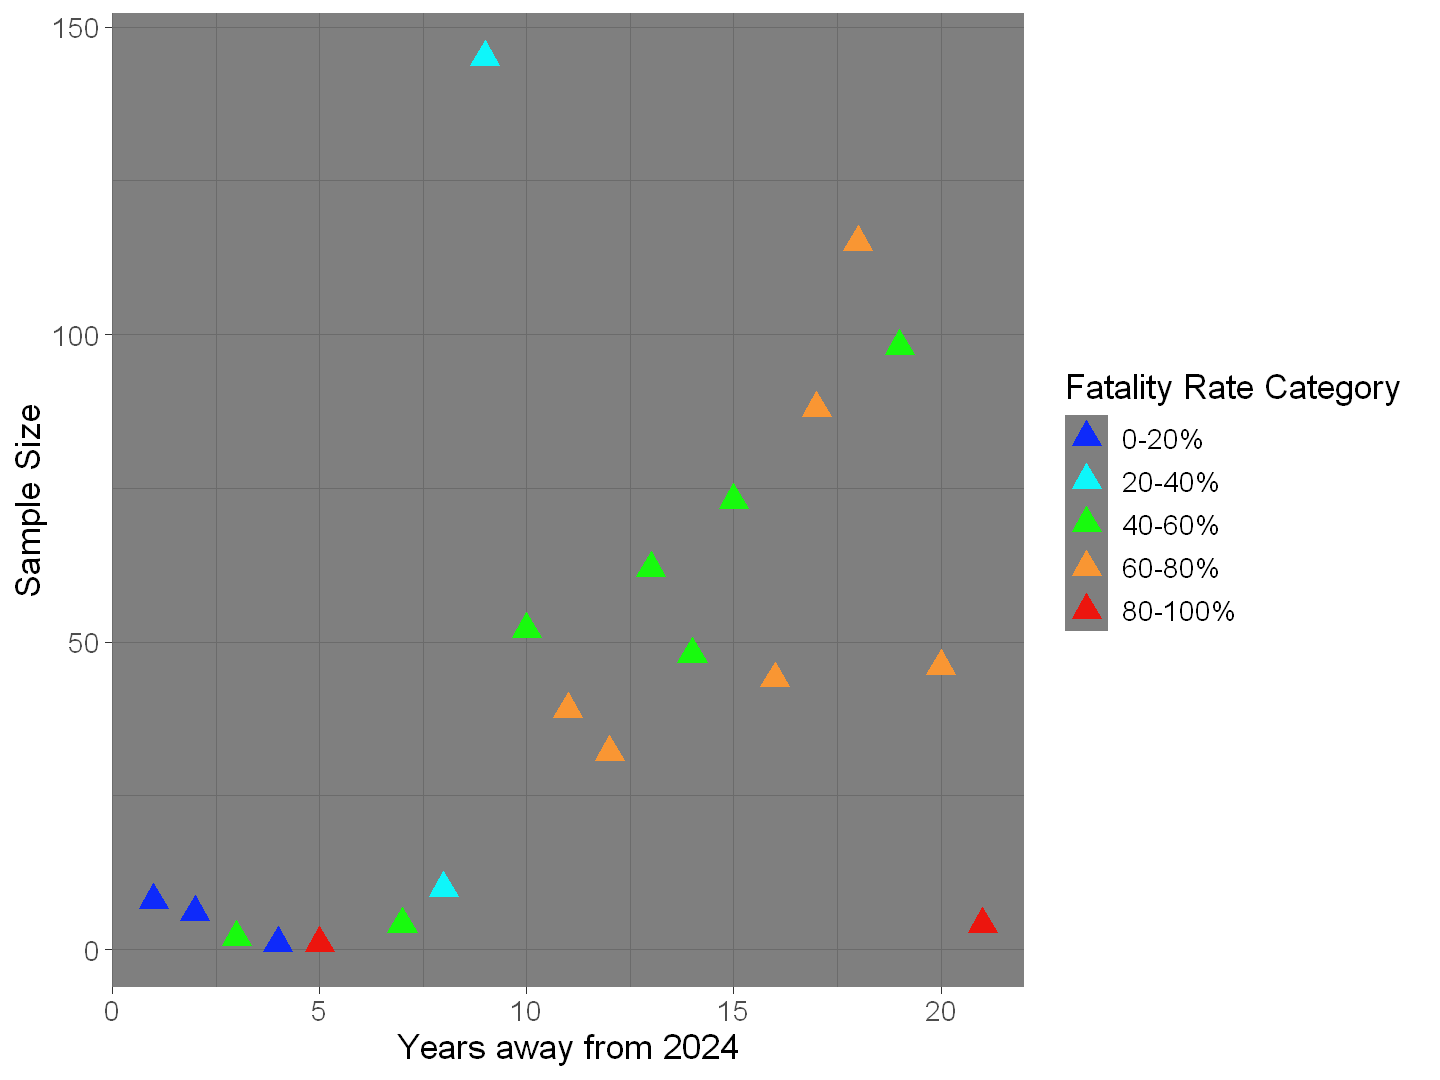

In [134]:
evil_plot <- fat_data |>
    ggplot(aes(x = `Years from 2024`, 
               y = `Sample Size`, 
               color = `Fatality_Category`)) +
    geom_point(size = 4, shape = 17) +  # Hexagonal points
    theme_dark() +
    theme(text = element_text(size = 14)) +
    labs(
        x = "Years away from 2024",
        y = "Sample Size",
        color = "Fatality Rate Category"
    ) +
    scale_color_manual(
        values = c(
            "F1" = "#0e2afa",  
            "F2" = "#0ef6fa",
            "F3" = "#18fa0e",
            "F4" = "#f99633",
            "F5" = "#ec150e"
        ),
        labels = c("0-20%", "20-40%", "40-60%", "60-80%", "80-100%")
    )
options(repr.plot.width = 8, repr.plot.height = 6,repr.plot.res = 180)

evil_plot

# Assigning weight to F1-F5, Depending on category, and evenly spreading out the remaining weight across F1-F5. 
note: I made a change so that the ones near get a little more weight.
There's 10 shares of uncertainty, the main gets 3, the ones around get 2 each, or 4, 

In [49]:
library(dst)
fat_data2 <- fat_data|>
  rowwise()|>
  mutate(array_col = case_when(
    Fatality_Category == "F1" ~ list(c(final_weight +(1 - final_weight)/5, (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 )),
    Fatality_Category == "F2" ~ list(c((1 - final_weight)/5 ,      final_weight+(1 - final_weight)/5, (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 )),
    Fatality_Category == "F3" ~ list(c((1 - final_weight)/5 ,      (1 - final_weight)/5 ,      final_weight+(1 - final_weight)/5, (1 - final_weight)/5 ,      (1 - final_weight)/5 )),
    Fatality_Category == "F4" ~ list(c((1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      final_weight+(1 - final_weight)/5, (1 - final_weight)/5 )),
    Fatality_Category == "F5" ~ list(c((1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      (1 - final_weight)/5 ,      final_weight+(1 - final_weight)/5))
  ))|>
  ungroup()

#fat_data2$`array_col`

array_matrix <- do.call(rbind, fat_data2$array_col)
#array_matrix

weights_df <- as.data.frame(array_matrix) %>%
  setNames(paste0("Position_", seq_len(ncol(array_matrix))))  # Rename columns

# Step 3: Add an ID column if needed for tracking
weights_df <- weights_df %>%
  mutate(Row_ID = row_number()) %>%
  relocate(Row_ID)
weights_df
#add code under this
#fat_data2



Row_ID,Position_1,Position_2,Position_3,Position_4,Position_5
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.1999172,0.1999172,0.1999172,0.1999172,0.2003311
2,0.1988374,0.1988374,0.1988374,0.2046503,0.1988374
3,0.1969749,0.1969749,0.2121004,0.1969749,0.1969749
4,0.1956643,0.1956643,0.1956643,0.2173429,0.1956643
5,0.1959477,0.1959477,0.1959477,0.2162090,0.1959477
6,0.1975253,0.1975253,0.1975253,0.2098987,0.1975253
7,0.1949854,0.1949854,0.2200584,0.1949854,0.1949854
8,0.1959728,0.1959728,0.2161089,0.1959728,0.1959728
9,0.1936466,0.1936466,0.2254135,0.1936466,0.1936466


# Some Extra processing to make the the array file work.

In [50]:
weights <- fat_data2 
  #unnest_wider(array_col, names_sep = "_")
str(weights$array_col[[1]])

weights <- weights|>
   mutate(
    array_str = map_chr(array_col, ~ paste(round(.x, 3), collapse = ","))
  )

tt1 <- rbind(
  c(1, 0, 0, 0, 0, 0),  # F1
  c(0, 0, 0, 0, 0, 1),  # F6
  c(1, 1, 1, 1, 1, 1)   # Full frame
)# the frame of discerment or whatever
m1 <- weights$array_col
#m1


library(purrr)

# A small helper to build a bca from a length-6 weight vector
bca_from_vector <- function(v, cnames = c("F1","F2","F3","F4","F5"),
                            varname = "FatalityRate") {
  # Identify which positions in 'v' are non-zero
  non_zero_idx <- which(v != 0)

  # If all are zero (unlikely, but just in case), return a "vacuous" BCA?
  if (length(non_zero_idx) == 0) {
    stop("All-zero vector -- cannot create a BCA.")
  }

  # Build a 'tt' matrix: each row corresponds to a subset with 1 in the relevant column(s)
  # BUT in your scenario, each subset is just a single element: F1 or F2 or ...
  # So each focal element is a row of zeros except 1 in that focal element's column.
  # We'll do one row per non-zero element.
  tt_list <- lapply(non_zero_idx, function(i) {
    rowvec <- rep(0, 5)
    rowvec[i] <- 1
    rowvec
  })
  tt <- do.call(rbind, tt_list)  # combine rows

  # The masses are exactly the non-zero entries of v
  m <- v[non_zero_idx]

  # Create the bca object
  bca(
    tt     = tt, 
    m      = m,
    cnames = cnames,
    varnames = varname
  )
}

weights_bca <- weights %>%
  mutate(
    bca_obj = map(array_col, ~ bca_from_vector(.x))
  )
weights_bca$bca_obj

#str(weights_bca)


 num [1:5] 0.2 0.2 0.2 0.2 0.2


[[1]]
$con
[1] 0

$tt
   F1 F2 F3 F4 F5
F1  1  0  0  0  0
F2  0  1  0  0  0
F3  0  0  1  0  0
F4  0  0  0  1  0
F5  0  0  0  0  1

$qq
function (x) 
{
    q <- 0
    for (i in 1:nrow(tt)) {
        if (all(tt[i, ] - x >= 0)) {
            q <- q + m[i]
        }
    }
    return(q)
}
<bytecode: 0x0000018e4ee275b8>
<environment: 0x0000018e51811e78>

$spec
   specnb      mass
F1      1 0.1999172
F2      2 0.1999172
F3      3 0.1999172
F4      4 0.1999172
F5      5 0.2003311

$infovar
     varnb size
[1,]     0    5

$varnames
[1] "FatalityRate"

$valuenames
$valuenames$FatalityRate
[1] "F1" "F2" "F3" "F4" "F5"


$ssnames
$ssnames[[1]]
[1] "F1"

$ssnames[[2]]
[1] "F2"

$ssnames[[3]]
[1] "F3"

$ssnames[[4]]
[1] "F4"

$ssnames[[5]]
[1] "F5"


$inforel
     relnb depth
[1,]     0     0

attr(,"class")
[1] "list"    "bcaspec"

[[2]]
$con
[1] 0

$tt
   F1 F2 F3 F4 F5
F1  1  0  0  0  0
F2  0  1  0  0  0
F3  0  0  1  0  0
F4  0  0  0  1  0
F5  0  0  0  0  1

$qq
function (x) 
{
    q <- 0
    for (i in 1:nrow(tt)) {
        if (all(tt[i, ] - x >= 0)) {
            q <- q + m[i]
        }
    }
    return(q)
}
<bytecode: 0x0000018e4ee275b8>
<environment: 0x0000018e517a5e40>

$spec
   specnb      mass
F1      1 0.1988374
F2      2 0.1988374
F3      3 0.1988374
F4      4 0.2046503
F5      5 0.1988374

$infovar
     varnb size
[1,]     0    5

$varnames
[1] "FatalityRate"

$valuenames
$valuenames$FatalityRate
[1] "F1" "F2" "F3" "F4" "F5"


$ssnames
$ssnames[[1]]
[1] "F1"

$ssnames[[2]]
[1] "F2"

$ssnames[[3]]
[1] "F3"

$ssnames[[4]]
[1] "F4"

$ssnames[[5]]
[1] "F5"


$inforel
     relnb depth
[1,]     0     0

attr(,"class")
[1] "list"    "bcaspec"

[[3]]
$con
[1] 0

$tt
   F1 F2 F3 F4 F5
F1  1  0  0  0  0
F2  0  1  0  0  0
F3  0  0  1  0  0
F4  0  0  0  1  0
F5  0  0  0  0  1

$qq
function (x) 
{
    q <- 0
    for (i in 1:nrow(tt)) {
        if (all(tt[i, ] - x >= 0)) {
            q <- q + m[i]
        }
    }
    return(q)
}
<bytecode: 0x0000018e4ee275b8>
<environment: 0x0000018e51780e08>

$spec
   specnb      mass
F1      1 0.1969749
F2      2 0.1969749
F3      3 0.2121004
F4      4 0.1969749
F5      5 0.1969749

$infovar
     varnb size
[1,]     0    5

$varnames
[1] "FatalityRate"

$valuenames
$valuenames$FatalityRate
[1] "F1" "F2" "F3" "F4" "F5"


$ssnames
$ssnames[[1]]
[1] "F1"

$ssnames[[2]]
[1] "F2"

$ssnames[[3]]
[1] "F3"

$ssnames[[4]]
[1] "F4"

$ssnames[[5]]
[1] "F5"


$inforel
     relnb depth
[1,]     0     0

attr(,"class")
[1] "list"    "bcaspec"

[[4]]
$con
[1] 0

$tt
   F1 F2 F3 F4 F5
F1  1  0  0  0  0
F2  0  1  0  0  0
F3  0  0  1  0  0
F4  0  0  0  1  0
F5  0  0  0  0  1

$qq
function (x) 
{
    q <- 0
    for (i in 1:nrow(tt)) {
        if (all(tt[i, ] - x >= 0)) {
            q <- q + m[i]
        }
    }
    return(q)
}
<bytecode: 0x0000018e4ee275b8>
<environment: 0x0000018e51752dd0>

$spec
   specnb      mass
F1      1 0.1956643
F2      2 0.1956643
F3      3 0.1956643
F4      4 0.2173429
F5      5 0.1956643

$infovar
     varnb size
[1,]     0    5

$varnames
[1] "FatalityRate"

$valuenames
$valuenames$FatalityRate
[1] "F1" "F2" "F3" "F4" "F5"


$ssnames
$ssnames[[1]]
[1] "F1"

$ssnames[[2]]
[1] "F2"

$ssnames[[3]]
[1] "F3"

$ssnames[[4]]
[1] "F4"

$ssnames[[5]]
[1] "F5"


$inforel
     relnb depth
[1,]     0     0

attr(,"class")
[1] "list"    "bcaspec"

[[5]]
$con
[1] 0

$tt
   F1 F2 F3 F4 F5
F1  1  0  0  0  0
F2  0  1  0  0  0
F3  0  0  1  0  0
F4  0  0  0  1  0
F5  0  0  0  0  1

$qq
function (x) 
{
    q <- 0
    for (i in 1:nrow(tt)) {
        if (all(tt[i, ] - x >= 0)) {
            q <- q + m[i]
        }
    }
    return(q)
}
<bytecode: 0x0000018e4ee275b8>
<environment: 0x0000018e5172bd98>

$spec
   specnb      mass
F1      1 0.1959477
F2      2 0.1959477
F3      3 0.1959477
F4      4 0.2162090
F5      5 0.1959477

$infovar
     varnb size
[1,]     0    5

$varnames
[1] "FatalityRate"

$valuenames
$valuenames$FatalityRate
[1] "F1" "F2" "F3" "F4" "F5"


$ssnames
$ssnames[[1]]
[1] "F1"

$ssnames[[2]]
[1] "F2

# I have no Idea I chatgpted this part but it works

In [51]:

combined_unnorm <- reduce(
  weights_bca$bca_obj,
  ~ dsrwon(.x, .y)     # .x is the "accumulator", .y is the next BCA
)
#combined_unnorm

# Now 'combined_unnorm' is a bcaspec representing the *unnormalized* combination.

combined_bca <- nzdsr(combined_unnorm)
#combined_bca

res_belplau <- belplau(combined_bca)
res_belplau

,bel,disbel,unc,plau,rplau
F1,0.1706708,0.8269366,0.002392637,0.1730634,0.2086788
F2,0.2534593,0.7441481,0.002392637,0.2558519,0.3427166
F3,0.2500416,0.7475657,0.002392637,0.2524343,0.3365977
F4,0.2027310,0.7948764,0.002392637,0.2051236,0.2572828
F5,0.1207047,0.8769027,0.002392637,0.1230973,0.1399954
